In [141]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
audit= pd.read_csv("audit_risk.csv")

In [143]:
audit.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [144]:
audit.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [145]:
audit= audit.dropna()

In [146]:
audit = audit.drop("LOCATION_ID", axis=1)

In [147]:
features = audit.drop("Risk", axis=1)
target = audit["Risk"]

In [148]:
X_train, X_test , y_train , y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [149]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [150]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [151]:
knn.score(X_test, y_test)

0.967741935483871

In [152]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [153]:
y_pred = knn.predict(X_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)

In [155]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [156]:
class_report = classification_report(y_test, y_pred)

In [157]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.967741935483871
Confusion Matrix:
 [[89  0]
 [ 5 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        89
           1       1.00      0.92      0.96        66

    accuracy                           0.97       155
   macro avg       0.97      0.96      0.97       155
weighted avg       0.97      0.97      0.97       155



In [158]:
audit["Risk"].value_counts()

Risk
0    470
1    305
Name: count, dtype: int64

In [159]:
audit.dtypes

Sector_score      float64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [160]:
# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [161]:
normalizer = MinMaxScaler()

In [162]:
normalizer.fit(X_train)

MinMaxScaler()

Transforming our training and testing data

In [163]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [164]:
X_train_norm

array([[9.26206897e-01, 9.41176471e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.67969612e-04],
       [0.00000000e+00, 2.41176471e-02, 1.00000000e+00, ...,
        1.48148148e-01, 0.00000000e+00, 1.07657281e-02],
       [2.68965517e-02, 4.27058824e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.42931470e-03],
       ...,
       [9.26206897e-01, 5.76470588e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.90072215e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.26206897e-01, 1.15294118e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.91686292e-04]])

In [165]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,0.926207,0.009412,0.0,0.003137,0.003948,0.0,0.001316,0.007159,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000441,0.000000,0.0,0.000268
1,0.000000,0.024118,1.0,0.024118,0.000000,0.0,0.000000,0.010713,0.0,0.0,...,0.0,0.4,0.0,0.0,0.0,0.2500,0.004403,0.148148,0.0,0.010766
2,0.026897,0.042706,1.0,0.042706,0.075144,0.5,0.050096,0.075669,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.3125,0.010579,0.000000,0.0,0.006429
3,0.015000,0.011294,0.0,0.003765,0.000000,0.0,0.000000,0.005017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000309,0.000000,0.0,0.000188
4,0.026897,0.122000,1.0,0.122000,0.731076,1.0,0.731076,0.605821,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.8750,0.169343,0.000000,0.0,0.102920


In [166]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,0.002414,0.005059,0.0,0.001686,0.000000,0.0,0.000000,0.002247,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1250,0.013211,0.000000,0.0,0.008029
1,0.926207,0.028471,1.0,0.028471,0.024448,1.0,0.024448,0.031093,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5625,0.009806,0.000000,0.0,0.005960
2,0.000000,0.107529,1.0,0.107529,0.008449,0.5,0.005633,0.054139,0.0,0.0,...,0.0,0.4,0.0,0.0,0.0,0.4375,0.010897,0.148148,0.0,0.022607
3,0.035172,0.000000,0.0,0.000000,0.005818,0.0,0.001939,0.004390,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000273,0.000000,0.0,0.000166
4,0.926207,0.008353,0.0,0.002784,0.001731,0.0,0.000577,0.005017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000309,0.000000,0.0,0.000188


In [167]:
##### KNN Regressor - modeling

In [168]:
knn = KNeighborsClassifier(n_neighbors=5)

Training KNN to our normalized data

In [169]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

Evaluate model's performance

In [170]:
knn.score(X_test_norm, y_test)

0.967741935483871

In [171]:
#Grafico correlaciones

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [173]:
features_corr = audit.drop(columns='Risk').corr()
features_corr = np.abs(audit.corr())


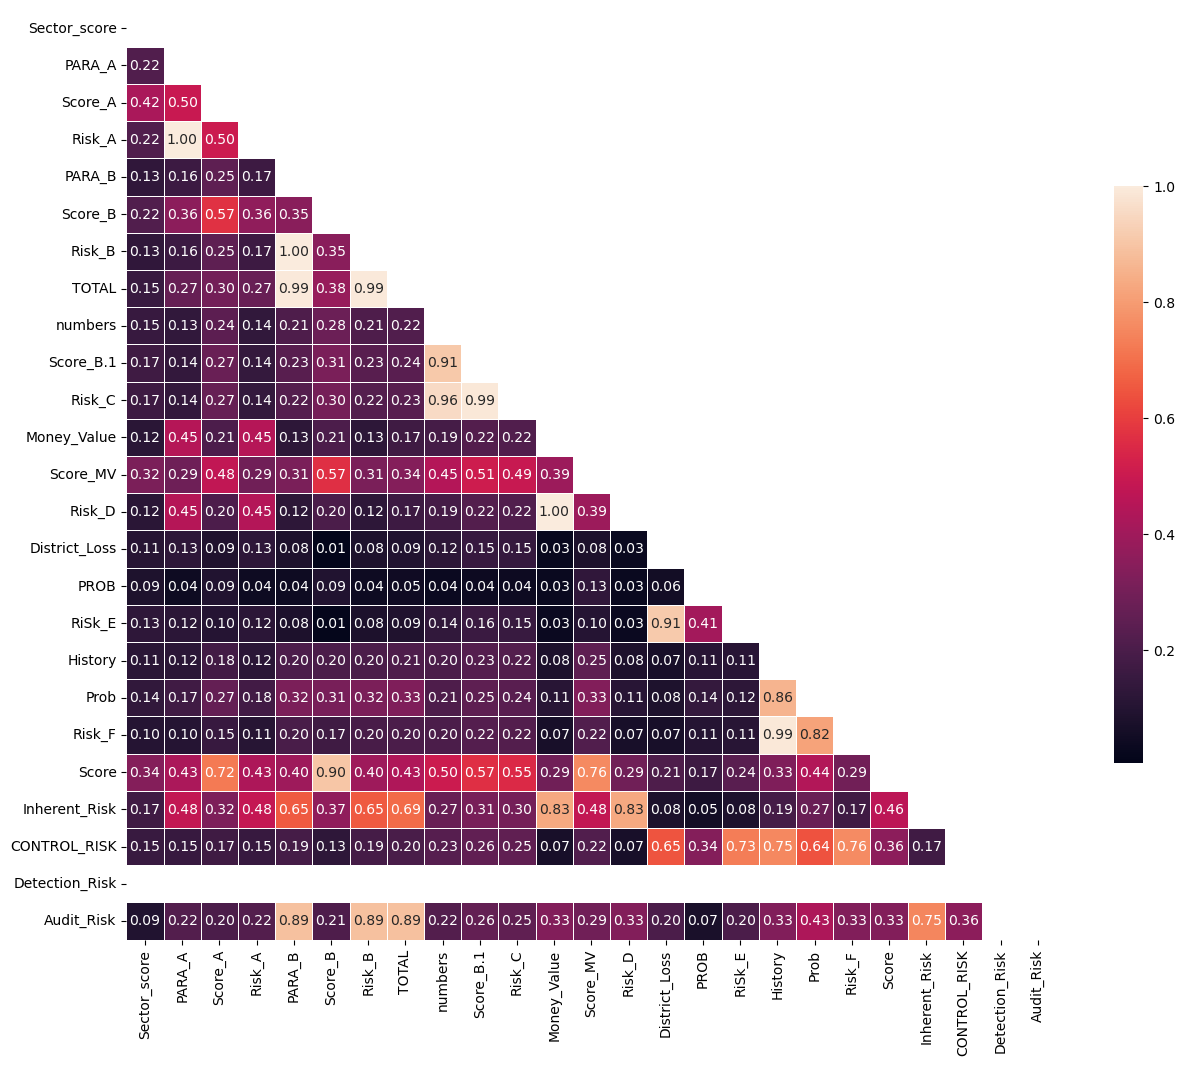

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#No metemos el Target 'RISK'

features_corr = np.abs(audit.drop(columns='Risk').corr())


mask = np.zeros_like(features_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(
    features_corr,
    mask=mask,
    vmax=1,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True,
    fmt=".2f",
    annot_kws={"size":10}
)

plt.show()


Elegir las columnas a eliminar cuando la correlacion es >0.8

In [175]:
# Supongamos que audit es tu dataframe y 'Risk' es el target
features = audit.drop(columns='Risk')
target = audit['Risk']

# 1️⃣ Matriz de correlación absoluta entre features
corr_matrix = features.corr().abs()

# 2️⃣ Crear un set para almacenar las columnas a eliminar
to_drop = set()

# 3️⃣ Iterar sobre la matriz para detectar pares correlacionados
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        
        if corr_value > threshold:
            # Calcular correlación con el target
            corr_col1_target = features[col1].corr(target)
            corr_col2_target = features[col2].corr(target)
            
            # Eliminar la que tenga menor correlación con el target
            if abs(corr_col1_target) >= abs(corr_col2_target):
                to_drop.add(col2)
            else:
                to_drop.add(col1)

print("Columns to drop due to high correlation:", to_drop)

# 4️⃣ Crear nuevo dataframe con features seleccionadas
features_selected = features.drop(columns=list(to_drop))

print("Features shape after drop:", features_selected.shape)


Columns to drop due to high correlation: {'PARA_A', 'Risk_D', 'Risk_C', 'District_Loss', 'PARA_B', 'Risk_B', 'Audit_Risk', 'Risk_F', 'Score_B', 'numbers', 'Money_Value', 'History'}
Features shape after drop: (775, 13)


In [176]:

columns_to_drop = list(to_drop)  

X_train_reduced = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test_reduced  = X_test.drop(columns=columns_to_drop, errors='ignore')



In [177]:
X_train_reduced

,Sector_score,Score_A,Risk_A,TOTAL,Score_B.1,Score_MV,PROB,RiSk_E,Prob,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk
766,55.57,0.2,0.160,1.37,0.2,0.2,0.2,0.4,0.2,2.0,1.674,0.4,0.5
419,1.85,0.6,1.230,2.05,0.2,0.2,0.2,1.2,0.2,2.8,4.136,1.2,0.5
118,3.41,0.6,2.178,14.48,0.2,0.2,0.2,0.4,0.2,3.0,7.974,0.4,0.5
252,2.72,0.2,0.192,0.96,0.2,0.2,0.2,0.4,0.2,2.0,1.592,0.4,0.5
157,3.41,0.6,6.222,115.93,0.6,0.6,0.2,0.4,0.2,4.8,106.636,0.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,55.57,0.4,0.592,5.96,0.2,0.2,0.2,0.4,0.2,3.4,4.680,0.4,0.5
192,2.72,0.6,2.430,25.71,0.4,0.6,0.2,0.4,0.2,4.4,29.096,0.4,0.5
629,55.57,0.2,0.098,5.27,0.2,0.2,0.2,0.4,0.2,3.2,4.366,0.4,0.5
559,59.85,0.2,0.000,0.00,0.2,0.2,0.2,0.4,0.2,2.0,1.400,0.4,0.5


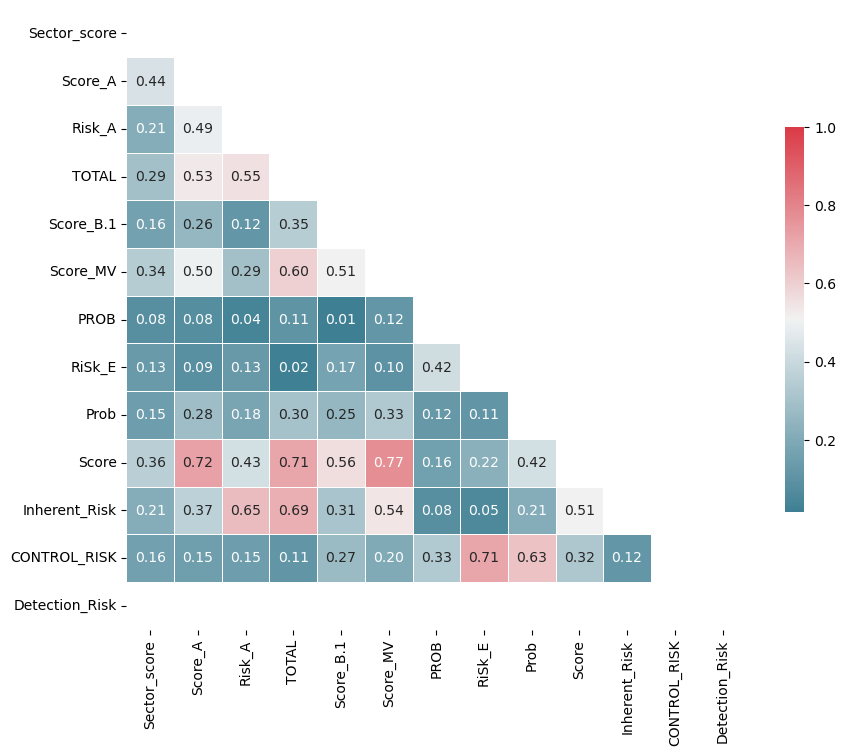

In [178]:
# heatmap de las variables que necesito
reduced = np.abs(X_train_reduced.corr())


mask = np.zeros_like(reduced, dtype=bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    reduced,
    mask=mask,
    vmax=1,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True,
    fmt=".2f",
    annot_kws={"size":10},
    cmap=cmap
)

plt.show()


In [179]:
#Ejecutar knn
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

knn.score(X_test_reduced, y_test)

0.9354838709677419

Bagging

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 200)

In [181]:
bagging_clf.fit(X_train_reduced, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=200, n_estimators=100)

In [182]:
pred = bagging_clf.predict(X_test_reduced)

In [183]:
# Predecir sobre el test set reducido
pred = bagging_clf.predict(X_test_reduced)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, pred))
print("F1-score:", f1_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Accuracy: 0.9806451612903225
F1-score: 0.9767441860465116
Confusion Matrix:
 [[89  0]
 [ 3 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.95      0.98        66

    accuracy                           0.98       155
   macro avg       0.98      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155



In [184]:
#DIFERENTES MODELOS

Random forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

# Entrenar con los datos reducidos
rf_clf.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [186]:
y_pred_rf = rf_clf.predict(X_test_reduced)


In [187]:
print("Random Forest Metrics\n")

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Metrics

Accuracy: 0.9806451612903225
F1-score: 0.9767441860465116
Confusion Matrix:
 [[89  0]
 [ 3 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.95      0.98        66

    accuracy                           0.98       155
   macro avg       0.98      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155



Gradient boosting

In [188]:
from sklearn.ensemble import GradientBoostingClassifier

In [189]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=0)

In [190]:
gb_clf.fit(X_train_reduced, y_train)

GradientBoostingClassifier(random_state=0)

In [191]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred_gb = gb_clf.predict(X_test_reduced)

print("Gradient Boosting Metrics\n")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1-score:", f1_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Metrics

Accuracy: 0.9935483870967742
F1-score: 0.9923664122137404
Confusion Matrix:
 [[89  0]
 [ 1 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.98      0.99        66

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



Adaboost

In [192]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [193]:
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20), n_estimators=100, random_state=42)

In [194]:
ada_clf.fit(X_train_reduced, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100, random_state=42)

In [195]:
y_pred_ada = ada_clf.predict(X_test_reduced)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

print("AdaBoost Metrics\n")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("F1-score:", f1_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))


AdaBoost Metrics

Accuracy: 0.9870967741935484
F1-score: 0.9846153846153847
Confusion Matrix:
 [[89  0]
 [ 2 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.97      0.98        66

    accuracy                           0.99       155
   macro avg       0.99      0.98      0.99       155
weighted avg       0.99      0.99      0.99       155



Grid Search

In [196]:
grid = {"n_estimators": [50, 100, 200,500],
        "estimator__max_leaf_nodes": [250, 500, 1000, None],
        "estimator__max_depth":[10,30,50]}

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [198]:
rf_clf = RandomForestClassifier(random_state=42)

In [199]:
grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30, None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 5, 10]
}

In [200]:
model = GridSearchCV(
    estimator=rf_clf,
    param_grid=grid,
    cv=5,
    scoring="f1",   # Clasificación binaria
    n_jobs=-1
)


In [201]:
model.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

- After training, we check what are the best values for the hyperparameters that we have tested.

In [202]:
model.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 100}

- You can retrieve the best model with the best parameters when accessing **best_estimator_** attribute

In [203]:
best_model = model.best_estimator_

In [204]:
y_pred = best_model.predict(X_test_reduced)


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9871
F1-score: 0.9846
Precision: 1.0000
Recall: 0.9697

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.97      0.98        66

    accuracy                           0.99       155
   macro avg       0.99      0.98      0.99       155
weighted avg       0.99      0.99      0.99       155



Random Search

**Random Search** - we define probability distributions for each hyperparameter, from which random values are sampled. It’s up to the researcher to set the maximum number of combinations.

In [205]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [206]:
rf_clf = RandomForestClassifier(random_state=42)


In [207]:
param_dist = {
    "n_estimators": randint(50, 500),          # número de árboles
    "max_depth": randint(10, 50),              # profundidad máxima de cada árbol
    "max_features": ["sqrt", "log2", None],    # número de características a considerar en cada split
    "min_samples_split": randint(2, 10)        # número mínimo de muestras para dividir un nodo
}

In [208]:
model = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=20,          # número de combinaciones aleatorias a probar
    cv=5,               # validación cruzada 5-fold
    scoring="f1",       # métrica de evaluación (clasificación binaria)
    n_jobs=-1,          # usar todos los núcleos disponibles
    random_state=42
)

In [209]:
model.fit(X_train_reduced, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14dc55220>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1499de330>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14dc555b0>},
                   random_state=42, scoring='f1')

In [210]:
model.best_params_

{'max_depth': 28,
 'max_features': None,
 'min_samples_split': 4,
 'n_estimators': 137}

- You can retrieve the best model with the best parameters when accessing **best_estimator_** attribute

In [211]:
best_model = model.best_estimator_

- Evaluate our model

In [212]:
# Mejor modelo y parámetros
best_rf = model.best_estimator_
print("Mejores hiperparámetros:", model.best_params_)
print("Mejor F1-score:", model.best_score_)

Mejores hiperparámetros: {'max_depth': 28, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 137}
Mejor F1-score: 0.9958333333333332


In [213]:
test_empresa = pd.DataFrame([{
    "Sector_score": 4.0,
    "Score_A": 0.5,
    "Risk_A": 2.3,
    "TOTAL": 6.0,
    "Score_B.1": 0.3,
    "Score_MV": 0.2,
    "PROB": 0.4,
    "RiSk_E": 0.4,
    "Prob": 0.2,
    "Score": 2.0,
    "Inherent_Risk": 8.0,
    "CONTROL_RISK": 0.4,
    "Detection_Risk": 0.5
}])

In [214]:
best_model.predict_proba(test_empresa)

array([[0., 1.]])

In [215]:
probs = best_model.predict_proba(test_empresa)
probs

array([[0., 1.]])

In [216]:
def evaluar_empresa(df):
    probs = best_model.predict_proba(df)
    salida = df.copy()
    salida["Prob_no_fraude"] = probs[:,0]
    salida["Prob_fraude"] = probs[:,1]
    salida["Predicción"] = best_model.predict(df)
    return salida

evaluar_empresa(test_empresa)

,Sector_score,Score_A,Risk_A,TOTAL,Score_B.1,Score_MV,PROB,RiSk_E,Prob,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Prob_no_fraude,Prob_fraude,Predicción
0,4.0,0.5,2.3,6.0,0.3,0.2,0.4,0.4,0.2,2.0,8.0,0.4,0.5,0.0,1.0,1


In [217]:
import joblib
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']

In [218]:
X_train_reduced

,Sector_score,Score_A,Risk_A,TOTAL,Score_B.1,Score_MV,PROB,RiSk_E,Prob,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk
766,55.57,0.2,0.160,1.37,0.2,0.2,0.2,0.4,0.2,2.0,1.674,0.4,0.5
419,1.85,0.6,1.230,2.05,0.2,0.2,0.2,1.2,0.2,2.8,4.136,1.2,0.5
118,3.41,0.6,2.178,14.48,0.2,0.2,0.2,0.4,0.2,3.0,7.974,0.4,0.5
252,2.72,0.2,0.192,0.96,0.2,0.2,0.2,0.4,0.2,2.0,1.592,0.4,0.5
157,3.41,0.6,6.222,115.93,0.6,0.6,0.2,0.4,0.2,4.8,106.636,0.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,55.57,0.4,0.592,5.96,0.2,0.2,0.2,0.4,0.2,3.4,4.680,0.4,0.5
192,2.72,0.6,2.430,25.71,0.4,0.6,0.2,0.4,0.2,4.4,29.096,0.4,0.5
629,55.57,0.2,0.098,5.27,0.2,0.2,0.2,0.4,0.2,3.2,4.366,0.4,0.5
559,59.85,0.2,0.000,0.00,0.2,0.2,0.2,0.4,0.2,2.0,1.400,0.4,0.5


In [219]:
audit.head(10)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,0.2,...,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,0.4,...,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,0.4,...,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,0.2,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0
